## 1. Set the project path once

In [1]:
import os

project_root_path = os.path.dirname(os.getcwd())
os.chdir(project_root_path)

print(f"Working directory set to: {os.getcwd()}")

Working directory set to: C:\Users\pfaha\PROJECTS\us-pr-diabetes-trends-2000-2014


## 2. Import all dependencies

In [2]:
from src.main.scripts.loaders.data_loader import SurveyLoader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 3. Load data

In [3]:
data_path = os.path.join(project_root_path, "data", "us-pr-surveys.parquet")
survey_loader = SurveyLoader(data_path)
surveys_df = survey_loader.load_df()

2026-01-18 19:02:41,458 - root - Loading survey data from: C:\Users\pfaha\PROJECTS\us-pr-diabetes-trends-2000-2014\data\us-pr-surveys.parquet
2026-01-18 19:02:41,569 - src.main.scripts.loaders.data_loader - Enforcing data types...
2026-01-18 19:02:41,571 - src.main.scripts.loaders.data_loader - is_your_blood_pressure_high: int64 → int32
2026-01-18 19:02:41,573 - src.main.scripts.loaders.data_loader - is_your_cholesterol_high: int64 → int32
2026-01-18 19:02:41,574 - src.main.scripts.loaders.data_loader - have_you_had_a_cholesterol_check_in_last_5years: int64 → int32
2026-01-18 19:02:41,575 - src.main.scripts.loaders.data_loader - your_bmi_value: int64 → float32
2026-01-18 19:02:41,576 - src.main.scripts.loaders.data_loader - have_you_ever_smoked_at_least_100cigs: int64 → int32
2026-01-18 19:02:41,577 - src.main.scripts.loaders.data_loader - have_you_ever_had_stroke: int64 → int32
2026-01-18 19:02:41,578 - src.main.scripts.loaders.data_loader - have_you_ever_had_coronary_heart_disease_or

In [4]:
surveys_df.head()

,are_you_a_man_with_at_least_14drinks_per_week_or_a_woman_with_at_least_7drinks_per_week,are_you_covered_by_any_healthcare_insurance,did_you_exercise_in_last_30days,do_you_eat_fruits_daily,do_you_eat_veggies_daily,have_you_diabetes_or_prediabetes,have_you_ever_had_coronary_heart_disease_or_myocardial_infarction,have_you_ever_had_stroke,have_you_ever_smoked_at_least_100cigs,have_you_had_a_cholesterol_check_in_last_5years,...,how_many_days_during_last_30days_your_physical_health_was_bad,is_your_blood_pressure_high,is_your_cholesterol_high,was_there_a_time_in_last_12months_you_could_not_afford_a_doctor_because_of_cost,your_age,your_bmi_value,your_education_level,your_gender,your_health_level_in_general,your_income_level
0,0,1,0,0,1,0,0,0,1,1,...,15,1,1,0,9,40.0,4,0,5,3
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,7,25.0,6,0,3,1
2,0,1,0,1,0,0,0,0,0,1,...,30,1,1,1,9,28.0,4,0,5,8
3,0,1,1,1,1,0,0,0,0,1,...,0,1,0,0,11,27.0,3,0,2,6
4,0,1,1,1,1,0,0,0,0,1,...,0,1,1,0,11,24.0,5,0,2,4


In [5]:
surveys_df.columns

Index(['are_you_a_man_with_at_least_14drinks_per_week_or_a_woman_with_at_least_7drinks_per_week',
       'are_you_covered_by_any_healthcare_insurance',
       'did_you_exercise_in_last_30days', 'do_you_eat_fruits_daily',
       'do_you_eat_veggies_daily', 'have_you_diabetes_or_prediabetes',
       'have_you_ever_had_coronary_heart_disease_or_myocardial_infarction',
       'have_you_ever_had_stroke', 'have_you_ever_smoked_at_least_100cigs',
       'have_you_had_a_cholesterol_check_in_last_5years',
       'have_you_serious_walking_difficulty',
       'how_many_days_during_last_30days_your_mental_health_was_bad',
       'how_many_days_during_last_30days_your_physical_health_was_bad',
       'is_your_blood_pressure_high', 'is_your_cholesterol_high',
       'was_there_a_time_in_last_12months_you_could_not_afford_a_doctor_because_of_cost',
       'your_age', 'your_bmi_value', 'your_education_level', 'your_gender',
       'your_health_level_in_general', 'your_income_level'],
      dtype='obje

In [6]:
surveys_df.shape

(253680, 22)

In [7]:
surveys_df.isna().sum()  # No missing value

are_you_a_man_with_at_least_14drinks_per_week_or_a_woman_with_at_least_7drinks_per_week    0
are_you_covered_by_any_healthcare_insurance                                                0
did_you_exercise_in_last_30days                                                            0
do_you_eat_fruits_daily                                                                    0
do_you_eat_veggies_daily                                                                   0
have_you_diabetes_or_prediabetes                                                           0
have_you_ever_had_coronary_heart_disease_or_myocardial_infarction                          0
have_you_ever_had_stroke                                                                   0
have_you_ever_smoked_at_least_100cigs                                                      0
have_you_had_a_cholesterol_check_in_last_5years                                            0
have_you_serious_walking_difficulty                                   

### 3. Perform univariate analysis

**Target have_you_diabetes_or_prediabetes**

0 means being healthy, whereas 1 means having diabetes or prediabetes

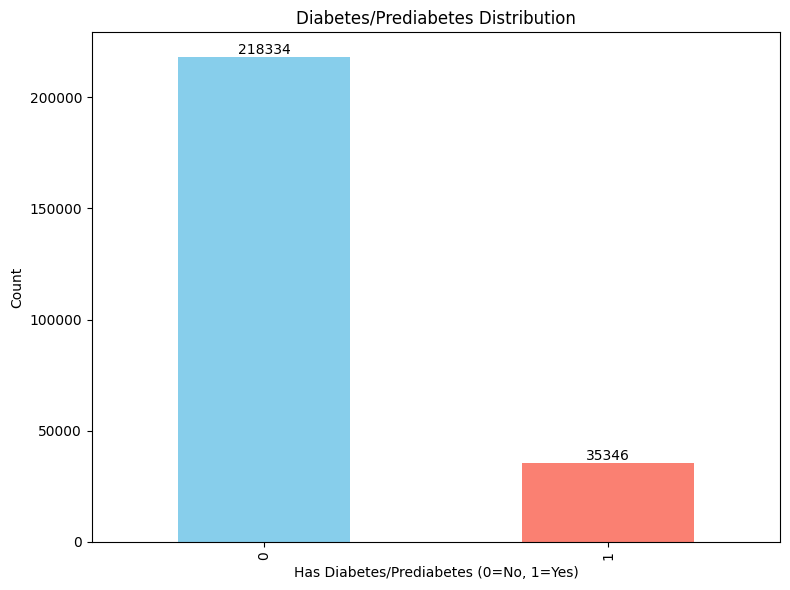

In [8]:
ax = (
    surveys_df["have_you_diabetes_or_prediabetes"]
    .value_counts()
    .sort_index()  # 0, 1 order
    .plot(
        kind="bar",
        title="Diabetes/Prediabetes Distribution",
        xlabel="Has Diabetes/Prediabetes (0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

We have a high imbalance: only 14% of the patients are diagnosed as having diabetes or prediabetes.

**Feature are_you_a_man_with_at_least_14drinks_per_week_or_a_woman_with_at_least_7drinks_per_week: drinking habits of people**

0 means being a man who has 14 drinks a week or a woman who has 7 drinks a week, but we do not have information on the measurement of these drinks.

In fact, having 14 drinks of 5 ml each can seem less harmless than having 10 drinks of 50 ml each.

Using these measurements of drinking habits to identify heavy drinkers from small ones cannot be totally justified, so we won't be using these terms.

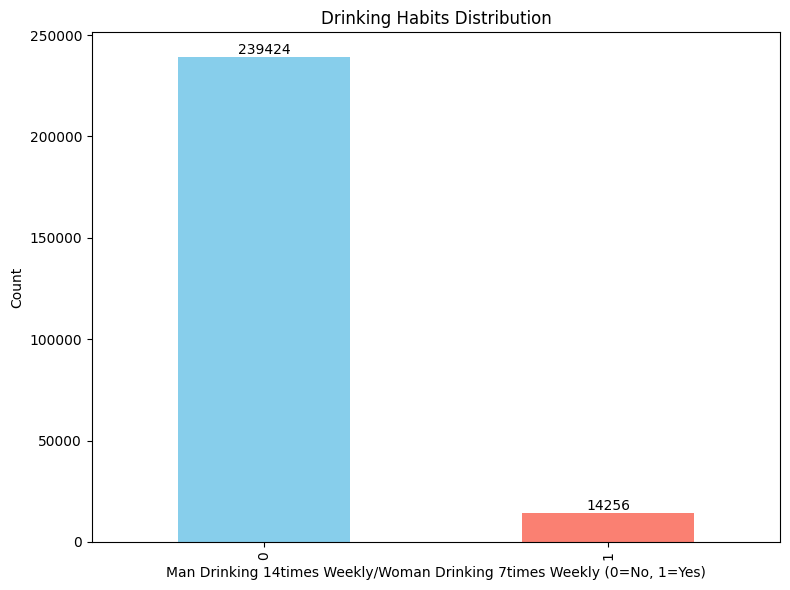

In [9]:
ax = (
    surveys_df[
        "are_you_a_man_with_at_least_14drinks_per_week_or_a_woman_with_at_least_7drinks_per_week"
    ]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Drinking Habits Distribution",
        xlabel="Man Drinking 14times Weekly/Woman Drinking 7times Weekly (0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

We have a high imbalance: only 5% of the patients are drinking at least 7 times a week.

**Feature are_you_covered_by_any_healthcare_insurance**

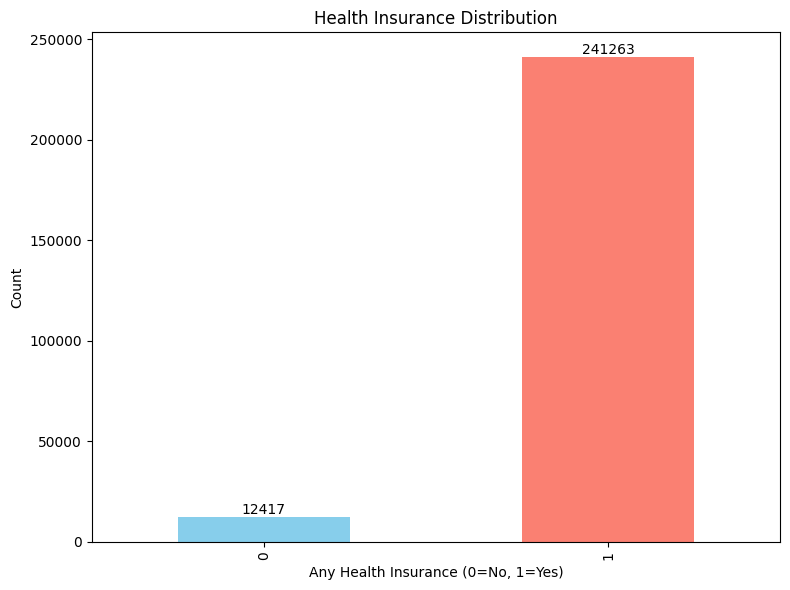

In [10]:
ax = (
    surveys_df["are_you_covered_by_any_healthcare_insurance"]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Health Insurance Distribution",
        xlabel="Any Health Insurance (0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

We have a high imbalance: only 5% of the patients are people without any health insurance.

**Feature did_you_exercise_in_last_30days**

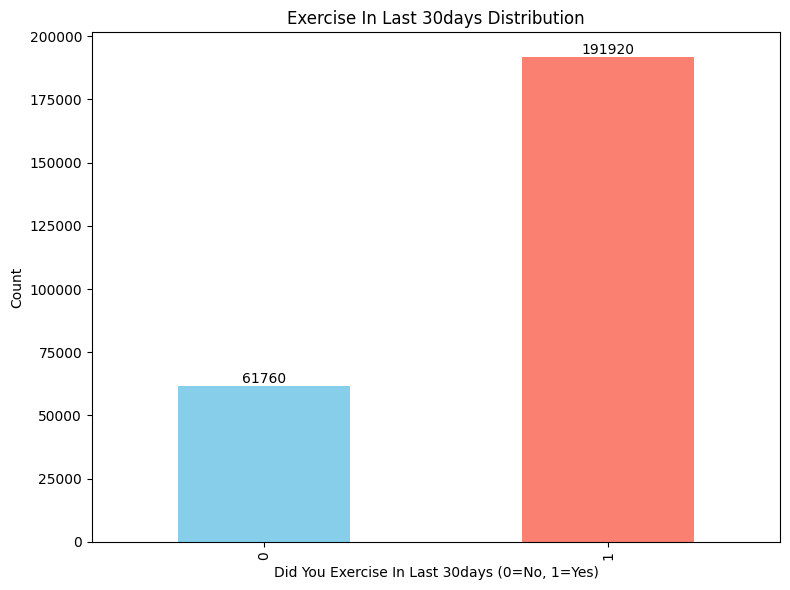

In [11]:
ax = (
    surveys_df["did_you_exercise_in_last_30days"]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Exercise In Last 30days Distribution",
        xlabel="Did You Exercise In Last 30days (0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

76% of people have exercised in the last 30 days, and although the rest didn't do it, we can't assume they have never exercised or do not exercise regularly. 

**Feature do_you_eat_fruits_daily**

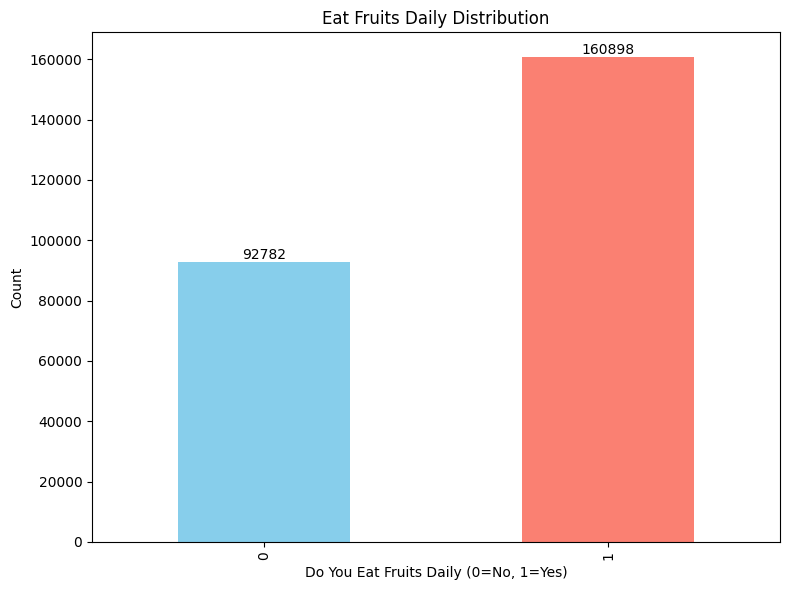

In [12]:
ax = (
    surveys_df["do_you_eat_fruits_daily"]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Eat Fruits Daily Distribution",
        xlabel="Do You Eat Fruits Daily (0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

We know that eating fruits daily can boost health, but not all fruits have the same effect. It would have been great to know the type of fruits eaten by each person.

63% of people eat fruits regularly, which is quite great.

**Feature do_you_eat_veggies_daily**

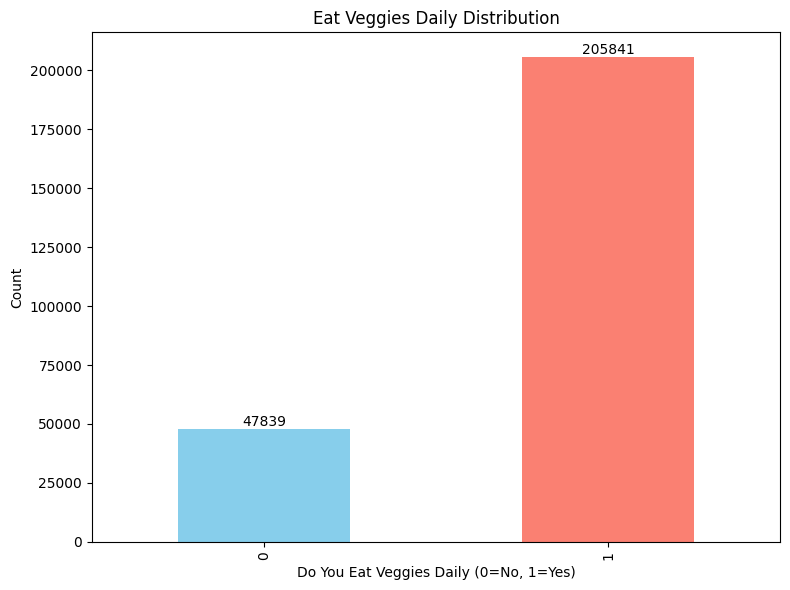

In [13]:
ax = (
    surveys_df["do_you_eat_veggies_daily"]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Eat Veggies Daily Distribution",
        xlabel="Do You Eat Veggies Daily (0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

As eating fruits daily boosts health, eating vegetables produces the same effect.

Compared to 63% for fruits, up to 81% of people eat veggies daily. Eating different types of veggies can various positive effects.

**Feature have_you_ever_had_coronary_heart_disease_or_myocardial_infarction**

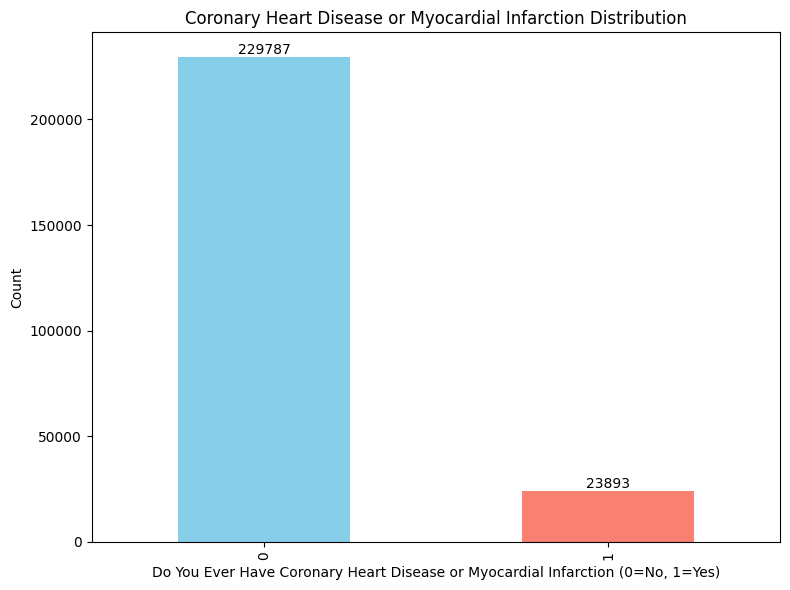

In [14]:
ax = (
    surveys_df["have_you_ever_had_coronary_heart_disease_or_myocardial_infarction"]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Coronary Heart Disease or Myocardial Infarction Distribution",
        xlabel="Do You Ever Have Coronary Heart Disease or Myocardial Infarction (0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

Coronary heart disease and myocardial infarction are episodes that people who are suffering from diabetes or prediabetes are subject to, but it doesn't mean that people without diabetes or prediabetes can never have them.

Only 9% of the people have been subject to these episodes.

**Feature have_you_ever_had_stroke**

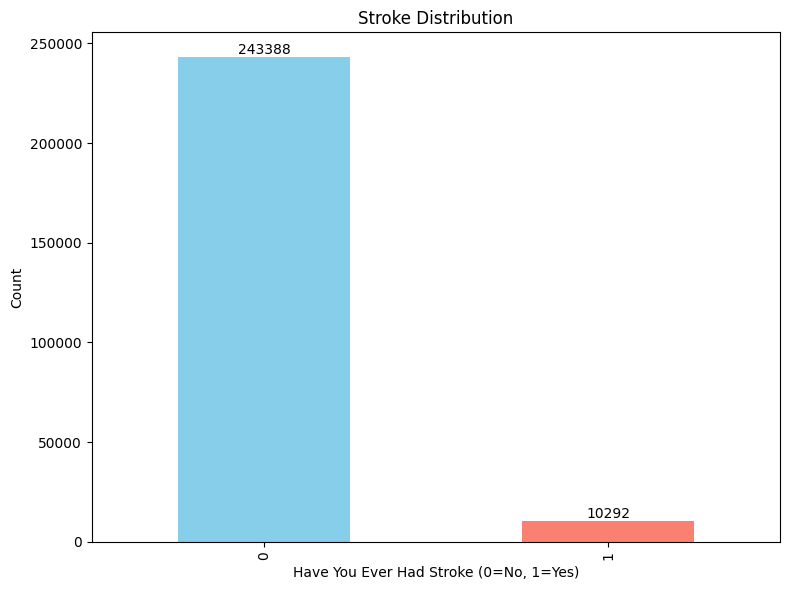

In [15]:
ax = (
    surveys_df["have_you_ever_had_stroke"]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Stroke Distribution",
        xlabel="Have You Ever Had Stroke (0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

Serious complications of diabetes or prediabetes (severe cases) can provoke a stroke, but it can also result from other sources.

Only 4% of people had once a stroke.

**Feature have_you_ever_smoked_at_least_100cigs**

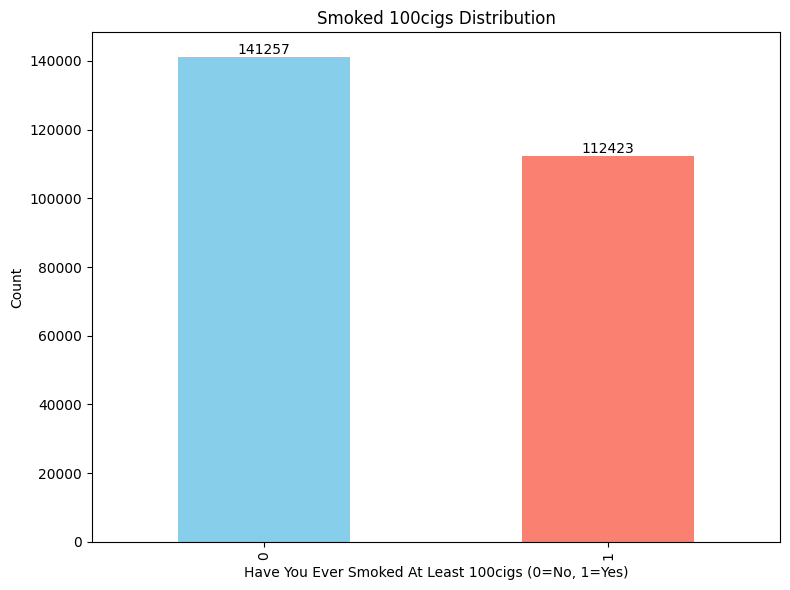

In [16]:
ax = (
    surveys_df["have_you_ever_smoked_at_least_100cigs"]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Smoked 100cigs Distribution",
        xlabel="Have You Ever Smoked At Least 100cigs (0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

44% of people have smoked at least 100 cigarettes in their lives. Dividing it by their age would give us a better idea of their smoking intensity, as well as their drinking habits. 

This standardisation approach by age value could be later studied for various features, but we need to think about the consequences brought by doing it too.

**Feature have_you_had_a_cholesterol_check_in_last_5years**

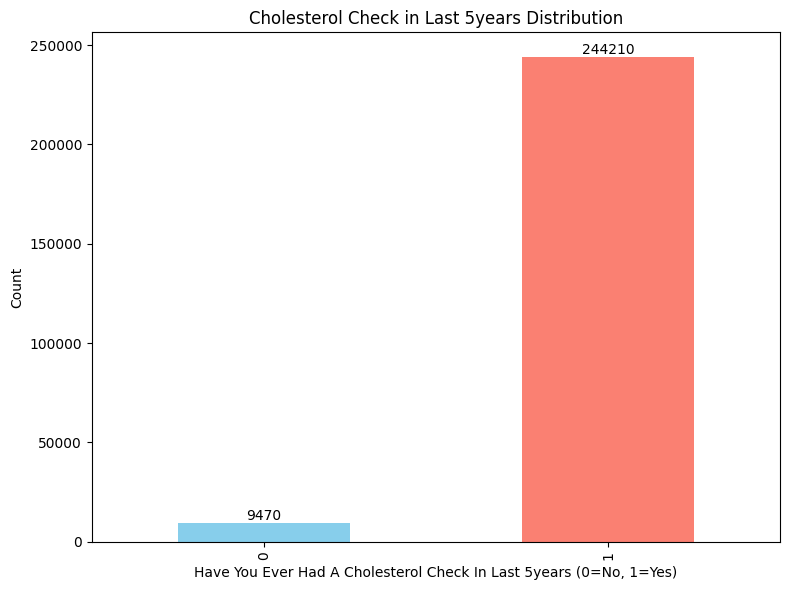

In [17]:
ax = (
    surveys_df["have_you_had_a_cholesterol_check_in_last_5years"]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Cholesterol Check in Last 5years Distribution",
        xlabel="Have You Ever Had A Cholesterol Check In Last 5years (0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

96% of people had a cholesterol check in the last 5 years, which can mean that some of them understand the consequences of suffering from it being abnormal, or just maybe were subject to this exam in the context of other medical problems.

**Feature have_you_serious_walking_difficulty**

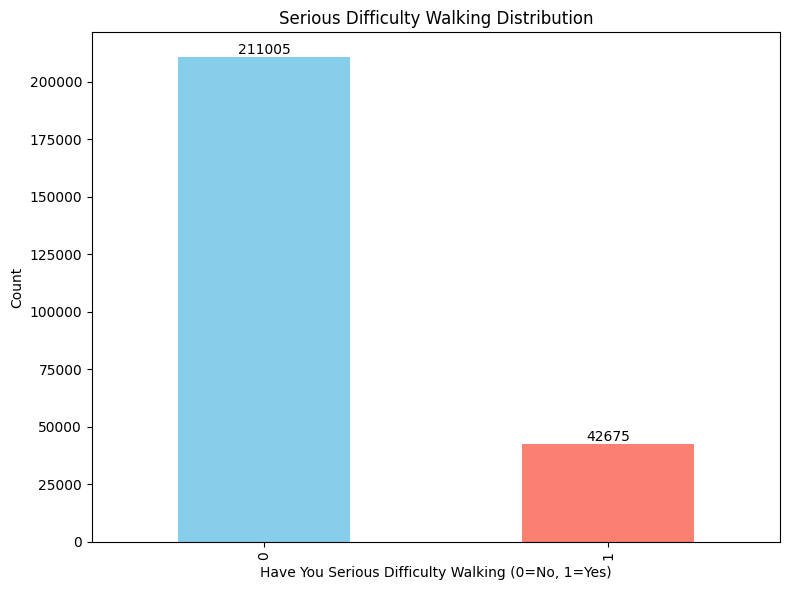

In [18]:
ax = (
    surveys_df["have_you_serious_walking_difficulty"]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Serious Difficulty Walking Distribution",
        xlabel="Have You Serious Difficulty Walking (0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

Up to 17% of people have serious difficulty walking, but we do not know if this difficulty arose from their diabetes/prediabetes state or from another medical condition.

**Feature how_many_days_during_last_30days_your_mental_health_was_bad**

In [19]:
surveys_df["how_many_days_during_last_30days_your_mental_health_was_bad"].describe()

count    253680.000000
mean          3.184772
std           7.412847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: how_many_days_during_last_30days_your_mental_health_was_bad, dtype: float64

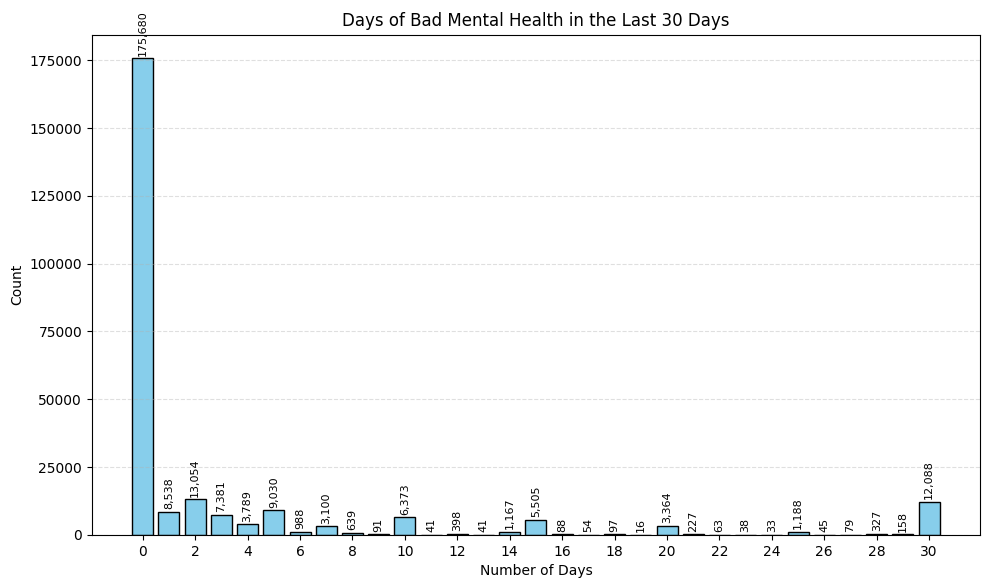

In [20]:
# Since we can have only 30 different values, a barplot can be used for a more in-depth understanding
series = (
    surveys_df["how_many_days_during_last_30days_your_mental_health_was_bad"]
    .value_counts()
    .sort_index()
)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(series.index, series.values, color="skyblue", edgecolor="black")
ax.set_title("Days of Bad Mental Health in the Last 30 Days")
ax.set_xlabel("Number of Days")
ax.set_ylabel("Count")

if len(series.index) > 15:
    ax.set_xticks(series.index[::2])
ax.bar_label(bars, fmt="{:,.0f}", padding=2, fontsize=8, rotation=90)
ax.yaxis.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

Most people (69%) stated that they had good mental health in their last 30 days; others have been subject to days with bad mental health.

Up to 5% of people had awful mental health during their whole last 30 days. 

Having more ideas on the kind of mental issue they were suffering from could bring more understanding.

**Feature how_many_days_during_last_30days_your_physical_health_was_bad**

In [21]:
surveys_df["how_many_days_during_last_30days_your_physical_health_was_bad"].describe()

count    253680.000000
mean          4.242081
std           8.717951
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: how_many_days_during_last_30days_your_physical_health_was_bad, dtype: float64

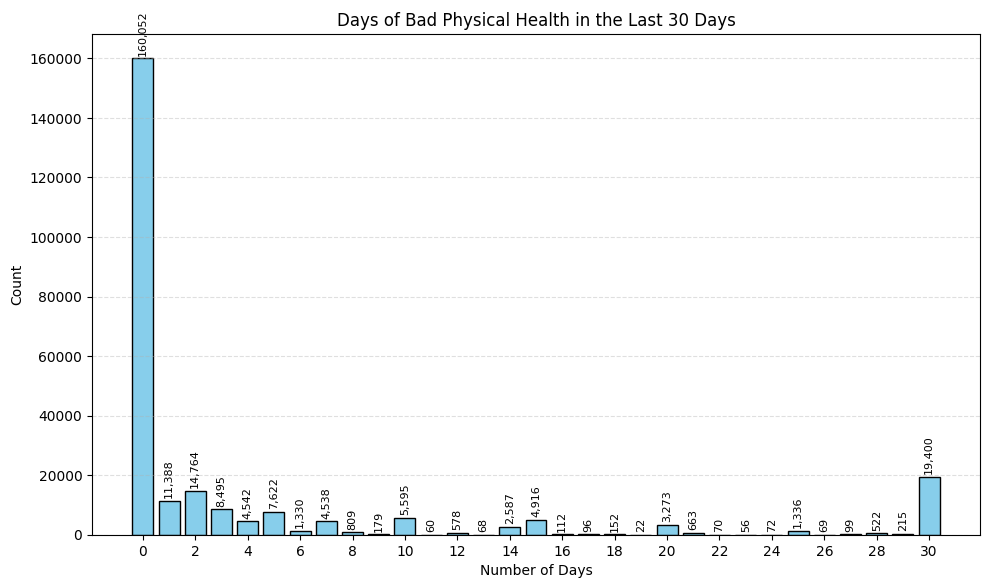

In [22]:
# Since we can have only 30 different values, a barplot can be used for a more in-depth understanding
series = (
    surveys_df["how_many_days_during_last_30days_your_physical_health_was_bad"]
    .value_counts()
    .sort_index()
)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(series.index, series.values, color="skyblue", edgecolor="black")
ax.set_title("Days of Bad Physical Health in the Last 30 Days")
ax.set_xlabel("Number of Days")
ax.set_ylabel("Count")

if len(series.index) > 15:
    ax.set_xticks(series.index[::2])
ax.bar_label(bars, fmt="{:,.0f}", padding=2, fontsize=8, rotation=90)
ax.yaxis.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

Most people (63%) stated that they had good physical health in their last 30 days; others have been subject to days with bad physical health. 

Up to 8% of people had awful physical health during their whole last 30 days.

Having more ideas on the kind of physical issue they were suffering from could bring more understanding.

**Feature is_your_blood_pressure_high**

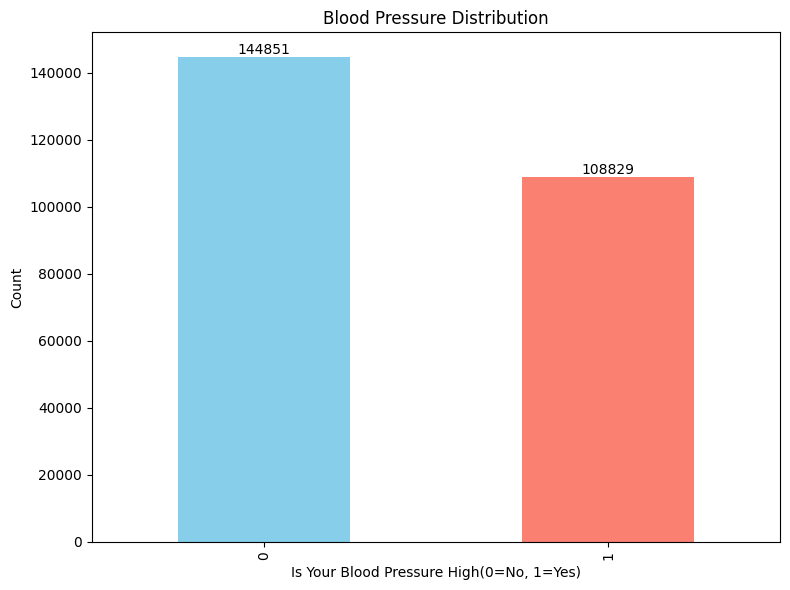

In [23]:
ax = (
    surveys_df["is_your_blood_pressure_high"]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Blood Pressure Distribution",
        xlabel="Is Your Blood Pressure High(0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

People with diabetes or prediabetes are subject to high blood pressure, but it's not the sole cause of it.

Up to 43% of people have high blood pressure.

**Feature is_your_cholesterol_high**

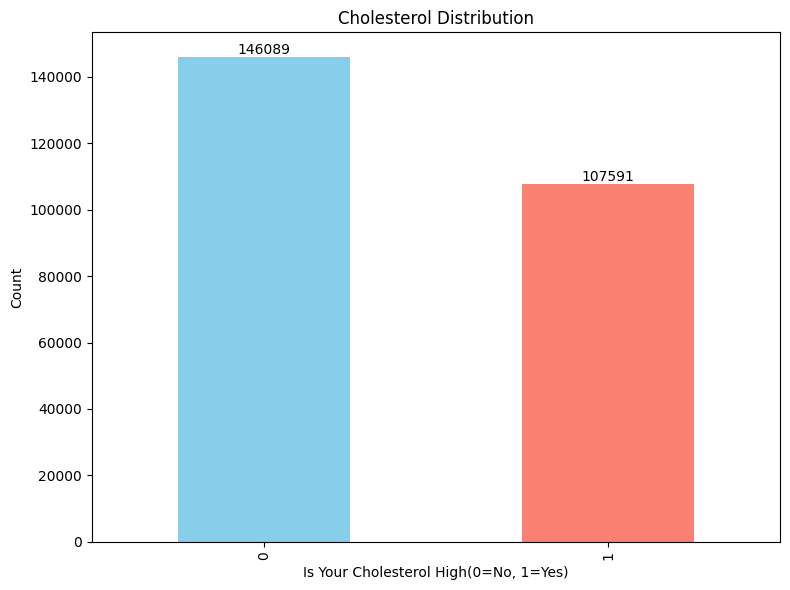

In [24]:
ax = (
    surveys_df["is_your_cholesterol_high"]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Cholesterol Distribution",
        xlabel="Is Your Cholesterol High(0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

Diabetes and prediabetes can be associated with high cholesterol, but it's not the sole cause of it.

Up to 42% of people have high cholesterol.

**Feature was_there_a_time_in_last_12months_you_could_not_afford_a_doctor_because_of_cost**

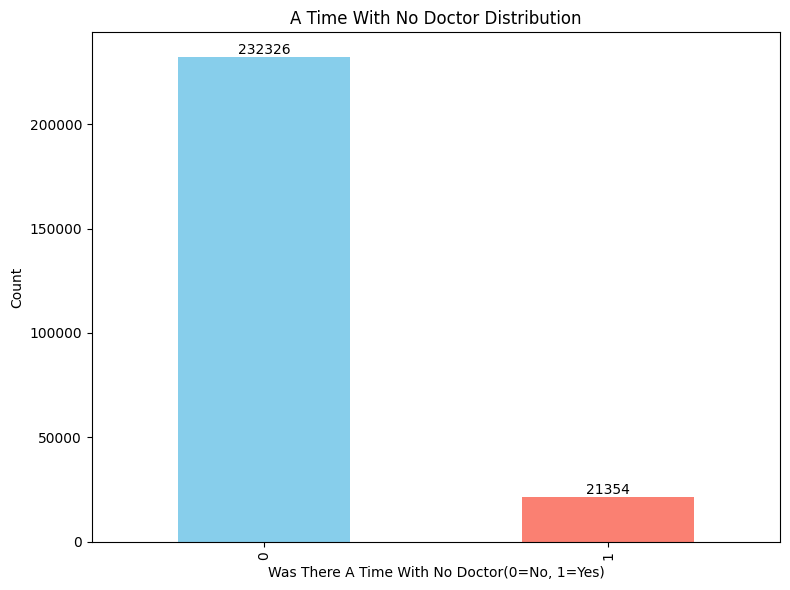

In [25]:
ax = (
    surveys_df[
        "was_there_a_time_in_last_12months_you_could_not_afford_a_doctor_because_of_cost"
    ]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="A Time With No Doctor Distribution",
        xlabel="Was There A Time With No Doctor(0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

Most people (91%) were able to afford a doctor in the last 12 months whenever it was needed, but the rest could not due to cost.

We cannot differentiate why doctors were needed (serious cases from simple ones), and whether it was only one or more than once that people who couldn't afford doctors.

**Feature your_age**

In [26]:
surveys_df["your_age"].describe()

count    253680.000000
mean          8.032119
std           3.054220
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: your_age, dtype: float64

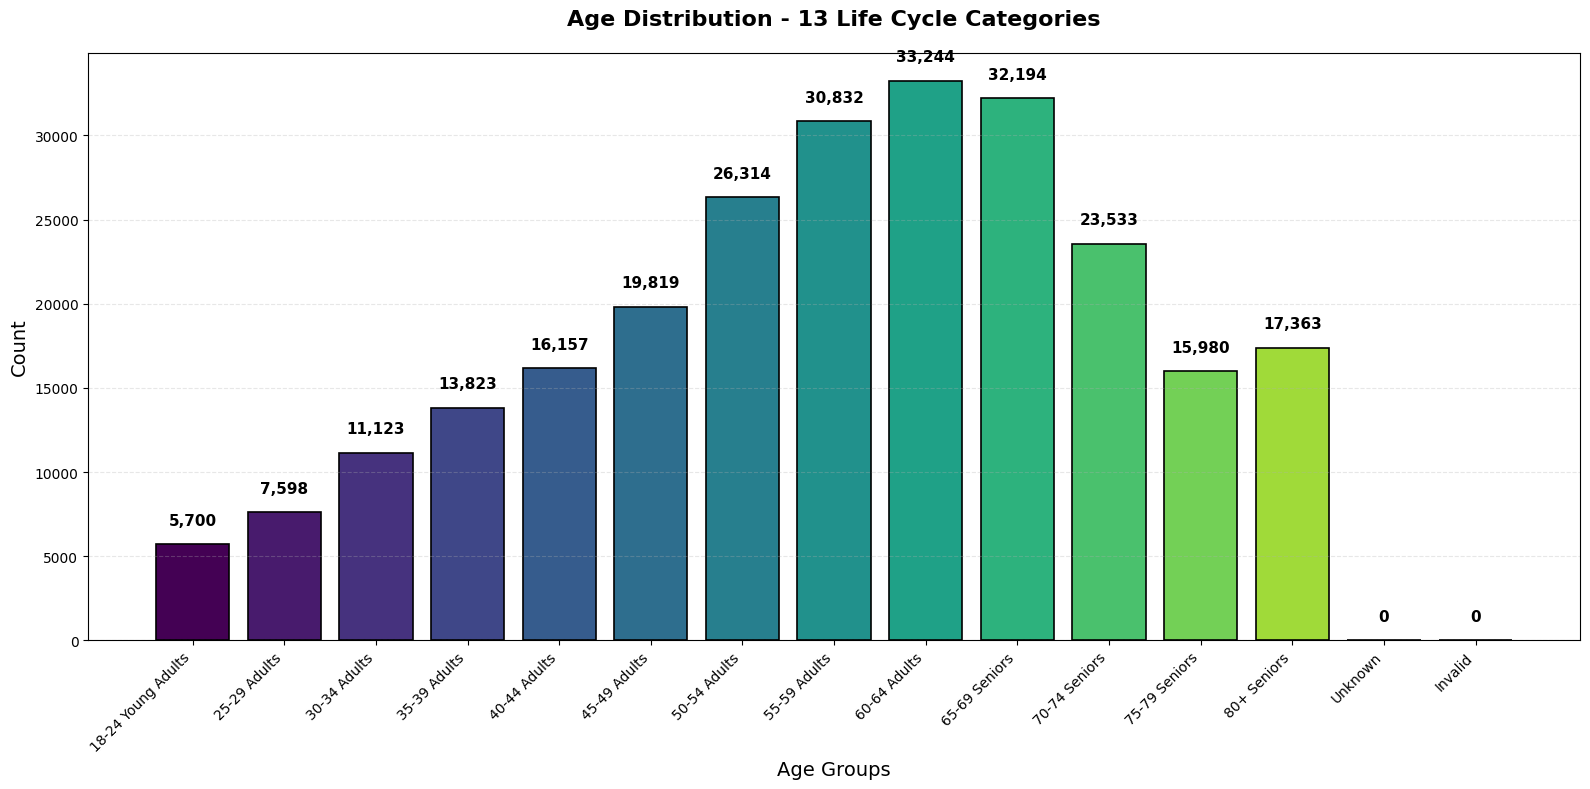

In [27]:
# Using information from the data, we need to map age to its category definition for a better explanation
def map_age_encoded_to_groups(age_encoded):
    """Map encoded age values 1-13 to real age groups."""
    if pd.isna(age_encoded):
        return "Unknown"
    age_map = {
        1: "18-24 Young Adults",
        2: "25-29 Adults",
        3: "30-34 Adults",
        4: "35-39 Adults",
        5: "40-44 Adults",
        6: "45-49 Adults",
        7: "50-54 Adults",
        8: "55-59 Adults",
        9: "60-64 Adults",
        10: "65-69 Seniors",
        11: "70-74 Seniors",
        12: "75-79 Seniors",
        13: "80+ Seniors",  # Oldest
    }
    return age_map.get(int(age_encoded), "Invalid")


# Apply mapping
series = surveys_df["your_age"].apply(map_age_encoded_to_groups).value_counts()

# Get counts in PROPER chronological order (1-13 → 18-24 to 80+)
ordered_age_categories = [
    "18-24 Young Adults",
    "25-29 Adults",
    "30-34 Adults",
    "35-39 Adults",
    "40-44 Adults",
    "45-49 Adults",
    "50-54 Adults",
    "55-59 Adults",
    "60-64 Adults",
    "65-69 Seniors",
    "70-74 Seniors",
    "75-79 Seniors",
    "80+ Seniors",
    "Unknown",
    "Invalid",
]
age_dist = series.reindex(ordered_age_categories, fill_value=0)

plt.figure(figsize=(16, 8))
bars = plt.bar(
    range(len(age_dist)),
    age_dist.values,
    color=plt.cm.viridis(np.linspace(0, 1, len(age_dist))),
    edgecolor="black",
    linewidth=1.2,
)

plt.title(
    "Age Distribution - 13 Life Cycle Categories",
    fontsize=16,
    fontweight="bold",
    pad=20,
)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Age Groups", fontsize=14)
plt.xticks(range(len(age_dist)), age_dist.index, rotation=45, ha="right")
for i, (bar, count) in enumerate(zip(bars, age_dist.values)):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1000,
        f"{int(count):,.0f}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
        rotation=0,
    )

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

Dominant age groups are those from 55 to 69, and younger people are the least present ones.

We do not have information asserting that this distribution is representative of the Puerto Rico and/or the US population. 

**Feature your_bmi_value**

In [28]:
surveys_df["your_bmi_value"].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: your_bmi_value, dtype: float64

<Axes: ylabel='Frequency'>

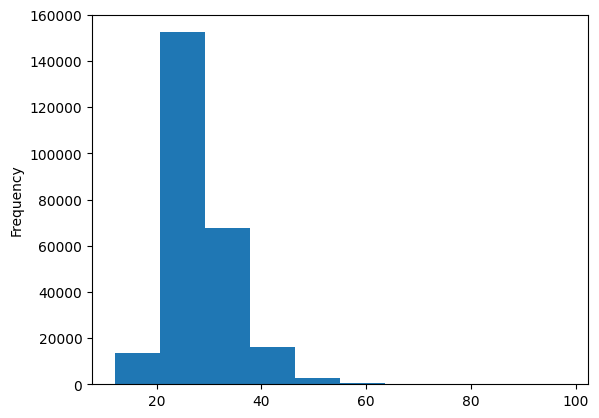

In [29]:
surveys_df["your_bmi_value"].plot(kind="hist")

BMI values range from 12 to 98: low (underweight) to very high (obese) body mass index.

**Feature your_education_level**

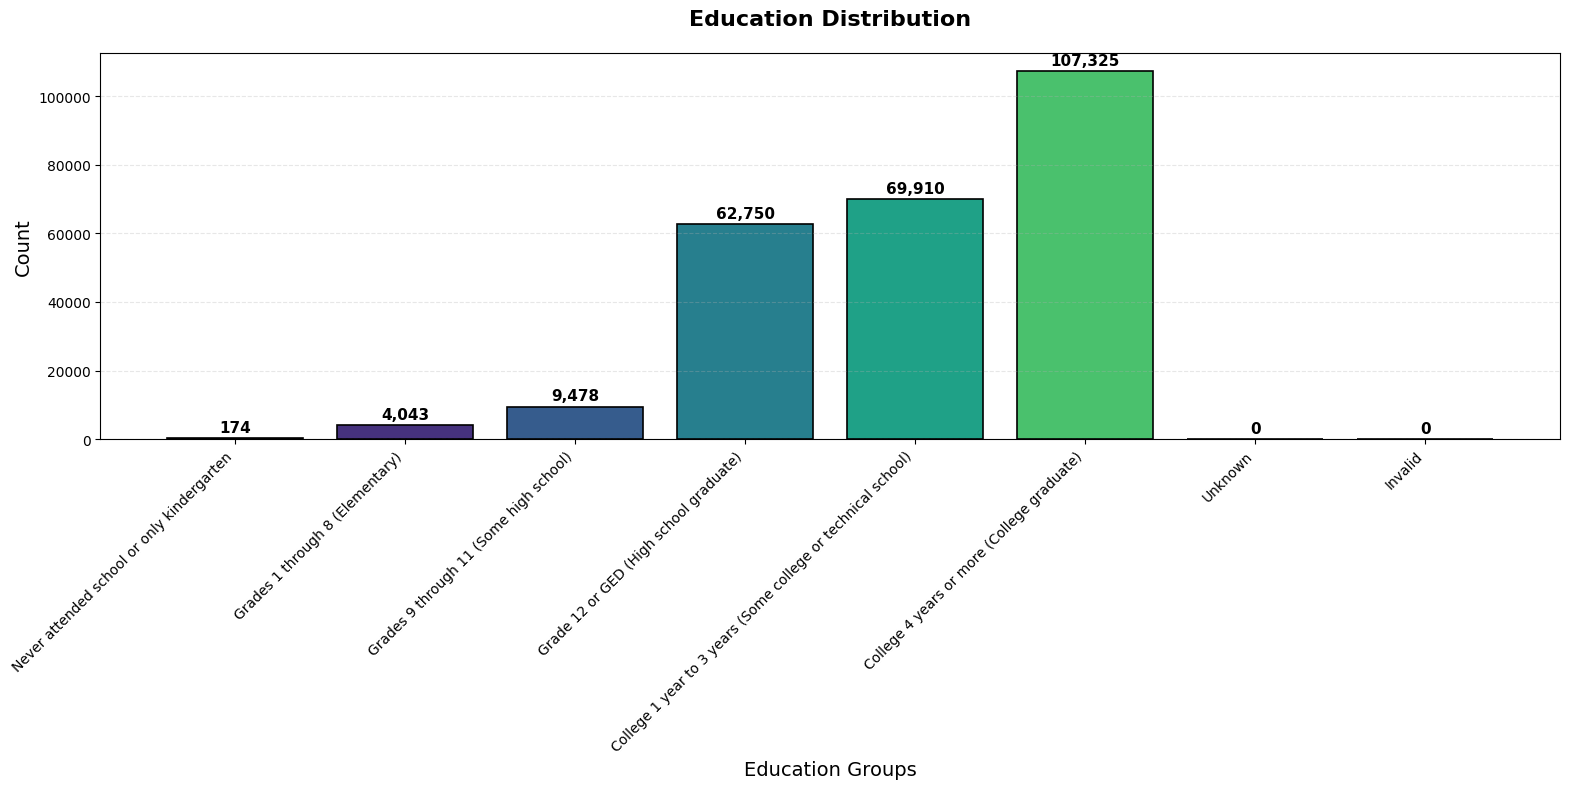

In [30]:
# Using information from the data, we need to map this feature to its category definition for a better explanation
def map_education_encoded_to_groups(education_encoded):
    """Map encoded education values to real groups."""
    if pd.isna(education_encoded):
        return "Unknown"
    education_map = {
        1: "Never attended school or only kindergarten",
        2: "Grades 1 through 8 (Elementary)",
        3: "Grades 9 through 11 (Some high school)",
        4: "Grade 12 or GED (High school graduate)",
        5: "College 1 year to 3 years (Some college or technical school)",
        6: "College 4 years or more (College graduate)",
    }
    return education_map.get(int(education_encoded), "Invalid")


# Apply mapping
series = (
    surveys_df["your_education_level"]
    .apply(map_education_encoded_to_groups)
    .value_counts()
)

# Get counts in PROPER chronological order
ordered_education_categories = [
    "Never attended school or only kindergarten",
    "Grades 1 through 8 (Elementary)",
    "Grades 9 through 11 (Some high school)",
    "Grade 12 or GED (High school graduate)",
    "College 1 year to 3 years (Some college or technical school)",
    "College 4 years or more (College graduate)",
    "Unknown",
    "Invalid",
]
education_dist = series.reindex(ordered_education_categories, fill_value=0)

plt.figure(figsize=(16, 8))
bars = plt.bar(
    range(len(education_dist)),
    education_dist.values,
    color=plt.cm.viridis(np.linspace(0, 1, len(education_dist))),
    edgecolor="black",
    linewidth=1.2,
)

plt.title("Education Distribution", fontsize=16, fontweight="bold", pad=20)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Education Groups", fontsize=14)
plt.xticks(range(len(education_dist)), education_dist.index, rotation=45, ha="right")
for i, (bar, count) in enumerate(zip(bars, education_dist.values)):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1000,
        f"{int(count):,.0f}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
        rotation=0,
    )

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

Only less than 1% of people have never attended school, and up to 70% have at least attended college.

**Feature your_gender**

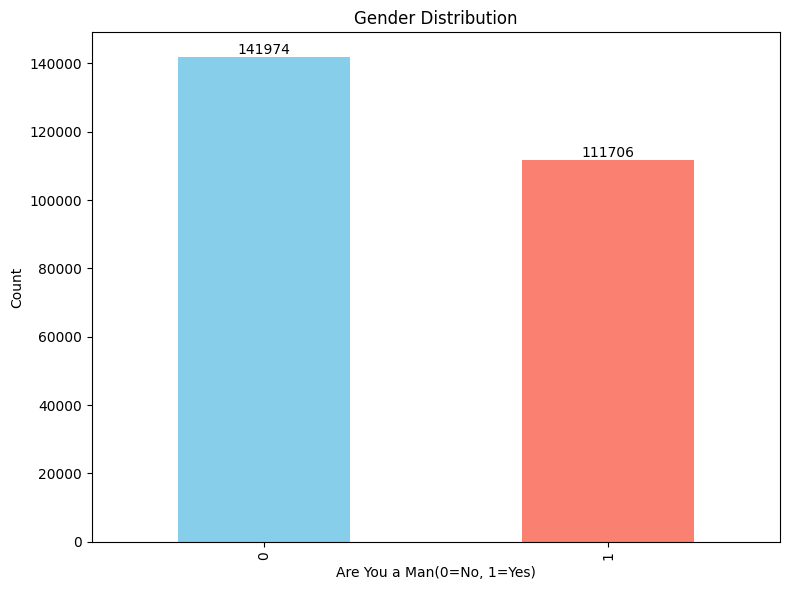

In [31]:
ax = (
    surveys_df["your_gender"]
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Gender Distribution",
        xlabel="Are You a Man(0=No, 1=Yes)",
        ylabel="Count",
        figsize=(8, 6),
        color=["skyblue", "salmon"],
    )
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

The proportion of women (55%) is higher to the one of men (45%). 

Maybe women were more interested in answering compared to men, or simply it's a representative distribution of Puerto Rico and/or the US population.

**Feature your_health_level_in_general**

This health level in general, is biased and very subjective to each person.

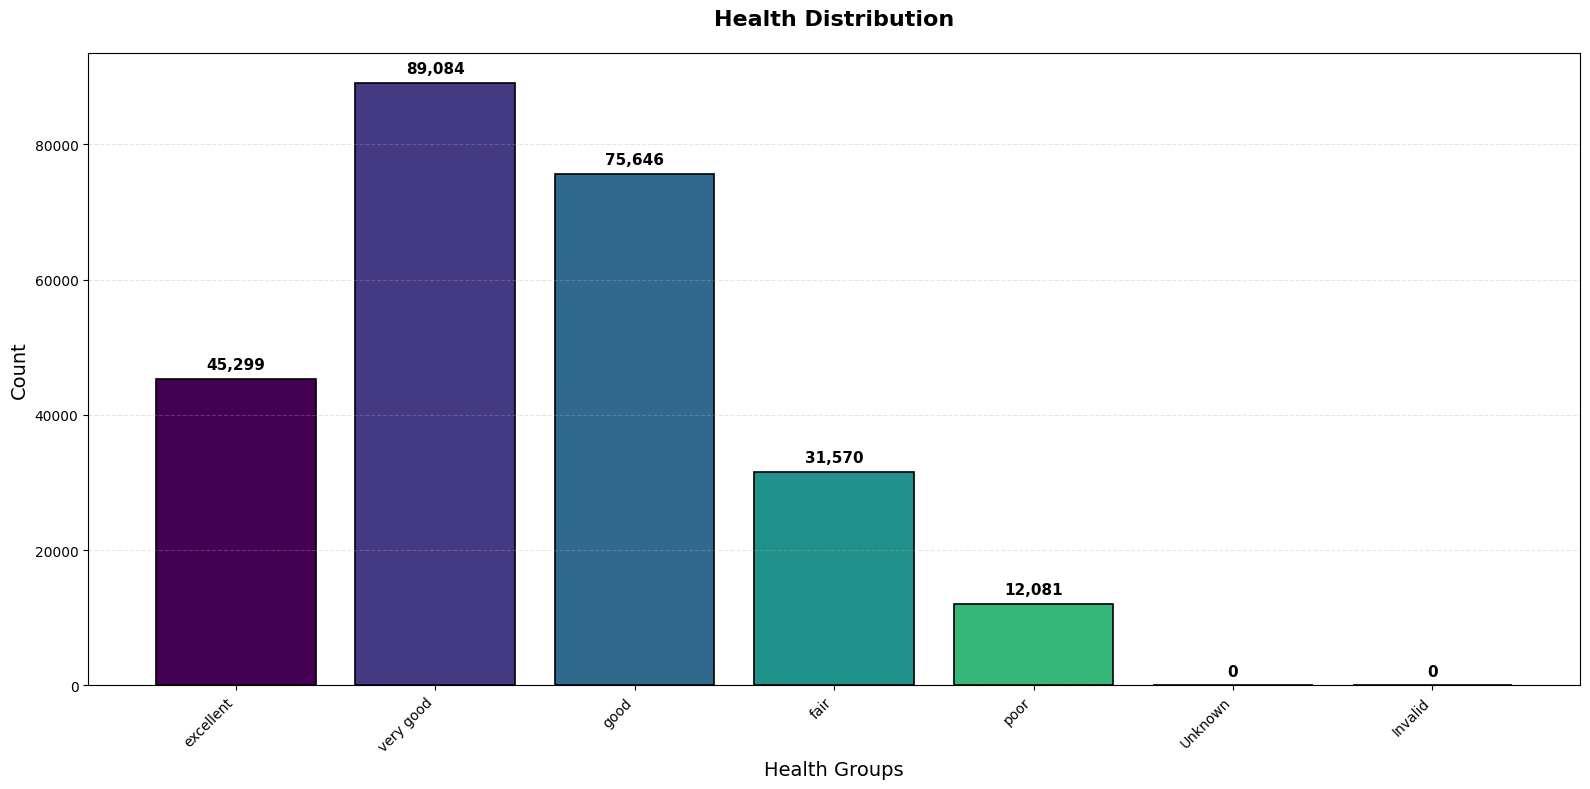

In [32]:
# Using information from the data, we need to map this feature to its category definition for a better explanation
def map_health_encoded_to_groups(health_encoded):
    """Map encoded health values 1-5 to real groups."""
    if pd.isna(health_encoded):
        return "Unknown"
    health_map = {1: "excellent", 2: "very good", 3: "good", 4: "fair", 5: "poor"}
    return health_map.get(int(health_encoded), "Invalid")


# Apply mapping
series = (
    surveys_df["your_health_level_in_general"]
    .apply(map_health_encoded_to_groups)
    .value_counts()
)

# Get counts in PROPER chronological order
ordered_health_categories = [
    "excellent",
    "very good",
    "good",
    "fair",
    "poor",
    "Unknown",
    "Invalid",
]
health_dist = series.reindex(ordered_health_categories, fill_value=0)

plt.figure(figsize=(16, 8))
bars = plt.bar(
    range(len(health_dist)),
    health_dist.values,
    color=plt.cm.viridis(np.linspace(0, 1, len(health_dist))),
    edgecolor="black",
    linewidth=1.2,
)

plt.title("Health Distribution", fontsize=16, fontweight="bold", pad=20)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Health Groups", fontsize=14)
plt.xticks(range(len(health_dist)), health_dist.index, rotation=45, ha="right")
for i, (bar, count) in enumerate(zip(bars, health_dist.values)):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1000,
        f"{int(count):,.0f}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
        rotation=0,
    )

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

Based on each person's judgment, 95% assume that their health ranges, in general, from fair to excellent state.

**Feature your_income_level**

Since there are very young people, this income level could be biased: very young people can't declare much income as theirs, since they can mostly depend on their parents/relatives.

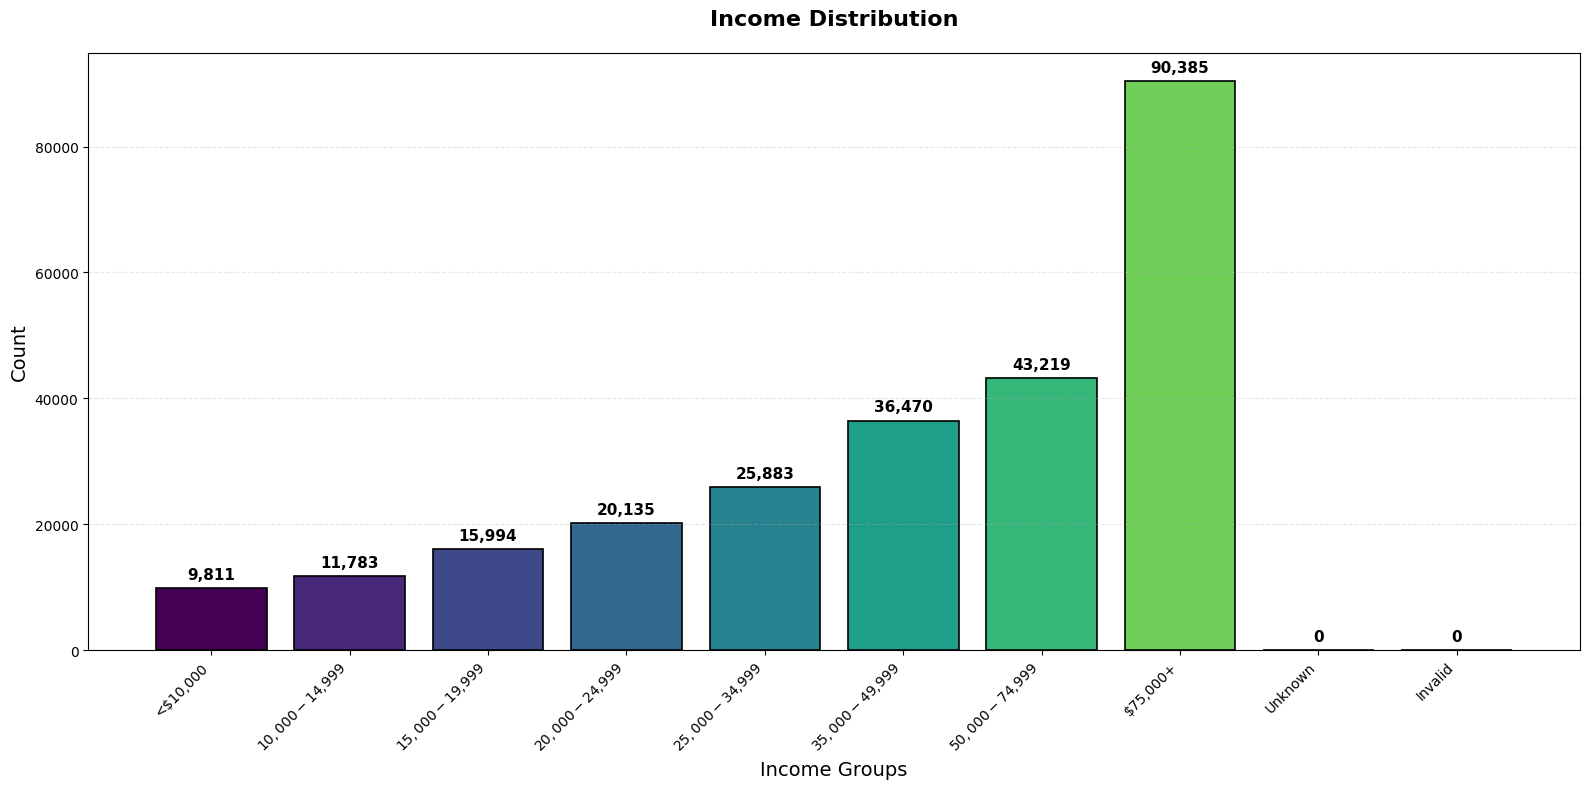

In [33]:
# Using information from the data, we need to map this feature to its category definition for a better explanation
# !!! But still, this mapping cannot be totally trusted since we don't know if it's the exact one used for the data
def map_income_to_groups(income_encoded):
    """Map INCOME scale 1-8 to annual income ranges."""
    if pd.isna(income_encoded):
        return "Unknown"
    income_map = {
        1: "<$10,000",
        2: "$10,000-$14,999",
        3: "$15,000-$19,999",
        4: "$20,000-$24,999",
        5: "$25,000-$34,999",
        6: "$35,000-$49,999",
        7: "$50,000-$74,999",
        8: "$75,000+",
    }
    return income_map.get(int(income_encoded), "Invalid")


# Apply mapping
series = surveys_df["your_income_level"].apply(map_income_to_groups).value_counts()

# Get counts in PROPER chronological order
ordered_income_categories = [
    "<$10,000",
    "$10,000-$14,999",
    "$15,000-$19,999",
    "$20,000-$24,999",
    "$25,000-$34,999",
    "$35,000-$49,999",
    "$50,000-$74,999",
    "$75,000+",
    "Unknown",
    "Invalid",
]
income_dist = series.reindex(ordered_income_categories, fill_value=0)

plt.figure(figsize=(16, 8))
bars = plt.bar(
    range(len(income_dist)),
    income_dist.values,
    color=plt.cm.viridis(np.linspace(0, 1, len(income_dist))),
    edgecolor="black",
    linewidth=1.2,
)

plt.title("Income Distribution", fontsize=16, fontweight="bold", pad=20)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Income Groups", fontsize=14)
plt.xticks(range(len(income_dist)), income_dist.index, rotation=45, ha="right")
for i, (bar, count) in enumerate(zip(bars, income_dist.values)):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1000,
        f"{int(count):,.0f}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
        rotation=0,
    )

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

### 4. Perform bivariate analysis